In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Сгенерировать последовательность из 1000 псевдослучайныхчисел (ПСЧ). Результат вывести в файл. Для генерации ис-пользоватьметод вычетов, результат считать непрерывнораспределенным ПСЧ.

(a) Оценить математическое ожидание полученной последовательности, результат вывести на экран.

(b) Оценить дисперсию полученной последовательности, результат вывести на экран.

(c) Доказать равномерность распределения ПСЧ. Построить две гистограммы – распределение смоделирован-ной ПСЧ и ожидаемое распределение, результаты в графической форме вывести в файл. Сравнить полученныеизображения, результаты и их анализ вставить в отчет.Количество столбцов диаграммы это (G%5+1)15+45, где G ваш номер в списке группы

In [2]:
N = 1000
G = 5
a = 0
b = 1
n_col = (G%5+1)*15+45
dx = (b-a) / n_col

In [3]:
def lcg(m=2**32-1, a=1103515245, c=12345):
    lcg.current = (a*lcg.current + c) % m
    return lcg.current/m

# seed = G
lcg.current = G

In [4]:
x = np.array([lcg(2**N-1)*(b-a)+a for _ in np.arange(N)])

In [5]:
M =  1/N * np.sum(x)
D = (x - M)**2

In [6]:
bins = np.array([len(x[(x < a + dx*i) & (x > a + dx*(i-1))]) for i in np.arange(1,n_col+1)])
print(bins)

[55  9 13 21 15 19 27 22 19 12 19 17 13 17 22 14 14  7 15 14 14 12 15 25
 20 11 13  8 18 13 18 12 21  8 14 19 20  9 13 19 14 16 12 17 22 13 21 21
 17 24 16 11 18 12 15 21 16 15 13 20]


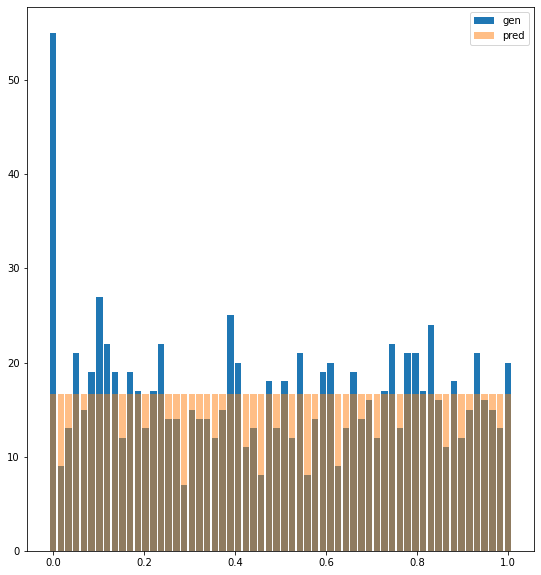

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.bar(np.linspace(a,b,n_col),bins,dx - (dx * 0.15),label='gen')
plt.bar(np.linspace(a,b,n_col),sum(bins)/n_col,dx - (dx * 0.15),alpha=0.5,label='pred')
plt.legend()
plt.show()

2. Смоделировать методом исключений непрерывную случайную величину с заданной плотностью распределения вероятности.

(a) Оценить математическое ожидание полученной непрерыв-ной случайной величины, результат вывести на экран.

(b) Оценить дисперсию полученной непрерывной случайнойвеличины, результат вывести на экран.4

(c) Проверить гипотезу о законе распределенияметодом ги-стограмм, вывести результаты в файл. Построить гисто-грамму, вывести ее в файл и вставить результат в отчет.Количество столбцов диаграммы это(G%5 + 1)15 + 45,где G ваш номер в списке группы.

In [18]:
a, b= 0, 6
N = 1000
G = 5
n_col = (G%5+1)*15+45
dx = (b-a) / n_col
f = lambda x: np.exp(-0.7*x)
M = np.max(f(np.linspace(a,b,100000)))
X = np.zeros(N)

In [19]:
for i in np.arange(N):
    while True:
        r1, r2 = np.random.random(), np.random.random()
        X0, n = a+r1*(b-a), r2*M
        if n < f(X0):
            X[i] = X0
            break

In [20]:
M =  1/N * np.sum(X)
D = (X - M)**2

In [21]:
bins = np.array([len(X[(X < a + dx*i) & (X > a + dx*(i-1))]) for i in np.arange(1,n_col+1)])
print(bins)


[70 61 53 64 54 41 48 35 39 37 29 32 30 22 29 27 25 23 22 19 15 19 17 11
 10 10 10 13  9 16  7  7  8  8  5  4  1  5  4  7  7  2  5  7  3  1  2  4
  4  3  4  0  2  3  1  2  0  0  3  1]


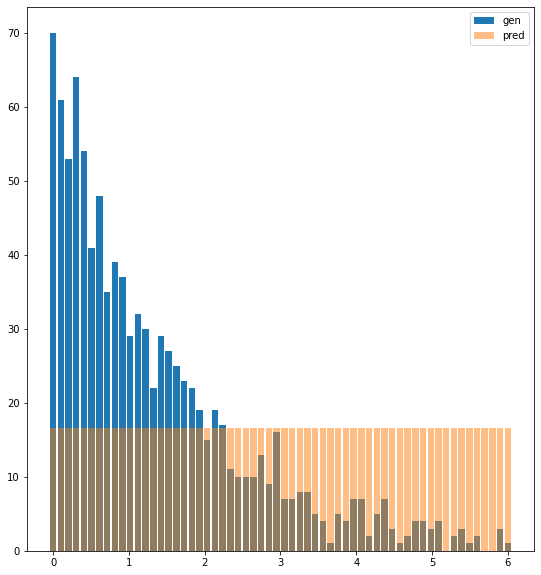

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.bar(np.linspace(a,b,n_col),bins,dx - (dx * 0.15),label='gen')
plt.bar(np.linspace(a,b,n_col),sum(bins)/n_col,dx - (dx * 0.15),alpha=0.5,label='pred')
plt.legend()
plt.show()